# Predicción de Cáncer de Seno

En este notebook se realizará un modelo que permita diagnosticar la existencia de cáncer de seno. Los datos para este ejercicio son tomados de [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) y son variables obtenidas a partir de imágenes digitales de masas en los senos. Según la fuente, estos datos son características de los núcleos presentes en las células de la imagen.

En este ejercicio se construirá un modelo de regresión logística como línea base, y una red neuronal de clasificación binaria.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from metrics import plot_confusion_matrix 
from sklearn.metrics import f1_score

# 1. Carga de Información y Exploración de Datos

Al cargar la información se puede notar que se cuenta con 33 columnas de información. La variable de interés corresponde a "diagnosis", que toma el valor de "M" cuando el tumor que se encuentra es de caracter maligno, y "B" cuando es benigno.

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df['cancer'] = 1*(df['diagnosis'] == 'M')

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


# 2. Train-Test Split

En esta sección se realiza la partición entre entrenamiento, validación y prueba. 

In [6]:
X_features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

y_label = 'cancer'

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[X_features], df[y_label], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [8]:
print(f'Tamaño de Información:\nEntrenamiento: {round(len(X_train)/len(df)*100, 1)}%. Target: ({round(np.mean(y_train)*100)}%)\n   Validación: {round(len(X_val)/len(df)*100, 1)}%. Target: ({round(np.mean(y_val)*100)}%)\n       Prueba: {round(len(X_test)/len(df)*100, 1)}%. Target: ({round(np.mean(y_test)*100)}%)')

Tamaño de Información:
Entrenamiento: 64.0%. Target: (37%)
   Validación: 16.0%. Target: (40%)
       Prueba: 20.0%. Target: (38%)


# 3. Reescalado de Información

Anteriormente se vio que las variables obtenidas de las imágenes presentan escalas muy diferentes. Con algunas cuya escala está entre 0 y 1, y otras como area_worst que va desde 185 hasta 4254. Por esta razón, se decide hacer un Min-Max Scaler. De esta forma, las variables estarán en el intervalo [0, 1], facilitando a la velocidad de convergencia del modelo de red neuronal.

Este Min-Max scaler será construído tomando los valores máximos y mínimos de cada variable del *conjunto de entrenamiento*, y utilizando estas se transformarán las variables de entrenamiento, validación y prueba.

In [9]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# 4. Modelo de Red Neuronal para Clasificación Binaria

Utilizaremos Binary Crossentropy como medida de ajuste y no el accuracy del modelo. Que el modelo sea más seguro de las clases y eso. Al final mediremos Accuracy, F1 y matriz de confusión

In [10]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(10, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks = [earlystopping_callback], verbose = 1)

Epoch 1/100
12/12 [==============================] - 1s 61ms/step - loss: 0.7159 - accuracy: 0.3956 - val_loss: 0.6972 - val_accuracy: 0.5495
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.5257 - val_loss: 0.6750 - val_accuracy: 0.6703
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6620 - accuracy: 0.6420 - val_loss: 0.6531 - val_accuracy: 0.7692
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6463 - accuracy: 0.7287 - val_loss: 0.6337 - val_accuracy: 0.7802
Epoch 5/100
12/12 [==============================] - 0s 12ms/step - loss: 0.6231 - accuracy: 0.8350 - val_loss: 0.6128 - val_accuracy: 0.8132
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6069 - accuracy: 0.8598 - val_loss: 0.5933 - val_accuracy: 0.8571
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5903 - accuracy: 0.8693 - val_loss: 0.5745 - val_accuracy: 0.8901
Epoch 8/100

In [13]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

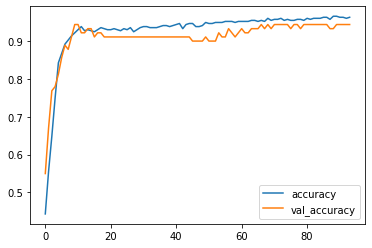

In [14]:
metrics[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

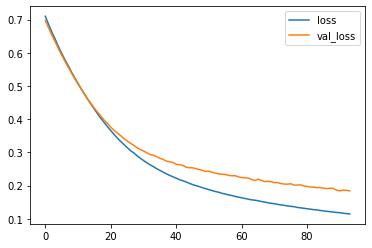

In [15]:
metrics[['loss', 'val_loss']].plot()

# 5. Evaluación del Modelo


In [16]:
y_pred = model.predict_classes(X_test)
y_true = y_test.values

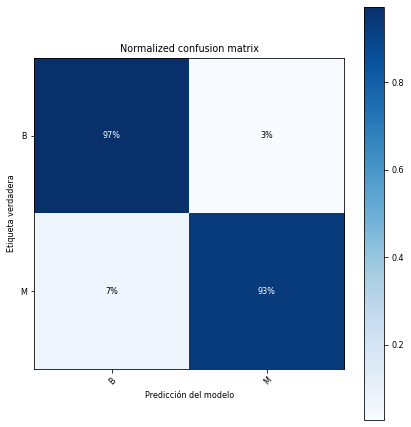

In [17]:
plot_confusion_matrix(y_true, y_pred, np.unique(df.diagnosis.values), normalize=True)
plt.show()

In [18]:
f1_score(y_pred, y_true, average = 'macro')

0.9531057178116